In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("Student_Performance.csv")

In [3]:
df[:5]

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


#### Replace "Yes" with 1 and "No" with 0

In [4]:
df = df.replace({"Yes": 1, "No": 0})

C:\Users\amogn\AppData\Local\Temp\ipykernel_20668\821598539.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"Yes": 1, "No": 0})


In [5]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


In [7]:
df.duplicated().any()

np.True_

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().any()

np.False_

In [10]:
df.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,0.494986,6.531652,4.583004,55.216651
std,2.589081,17.325601,0.500000,1.697683,2.867202,19.208570
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


### What is the correlation between all the columns and Performance Index

In [11]:
df.corr()["Performance Index"]

Hours Studied                       0.375332
Previous Scores                     0.915135
Extracurricular Activities          0.026075
Sleep Hours                         0.050352
Sample Question Papers Practiced    0.043436
Performance Index                   1.000000
Name: Performance Index, dtype: float64

#### We can see that Previous Scores has the highest correlation with performance index and Extracurricular Activities has the lowest correlation. 

#### We can drop the Extracurricular Activities column

In [12]:
# Dropping unnecesary features and the target column

X = df.drop(["Performance Index", "Extracurricular Activities"], axis=1)

In [13]:
X[:5]

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
0,7,99,9,1
1,4,82,4,2
2,8,51,7,2
3,5,52,5,2
4,7,75,8,5


In [14]:
X[:5]

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
0,7,99,9,1
1,4,82,4,2
2,8,51,7,2
3,5,52,5,2
4,7,75,8,5


In [15]:
# Setting the target

Y = df[["Performance Index"]]
Y[:5]

,Performance Index
0,91.0
1,65.0
2,45.0
3,36.0
4,66.0


In [16]:
print(Y.shape)
print(X.shape)

(9873, 1)
(9873, 4)


In [17]:
# Split into train and test data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7898, 4)
(7898, 1)
(1975, 4)
(1975, 1)


In [19]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(x_test)

### Model Accuracy

In [21]:
acc = r2_score(y_test, y_pred)
print(f"Model Accuracy: {acc * 100}%")

Model Accuracy: 98.80446845278523%


### Plot to see the Actual Test Values vs Predicted Values

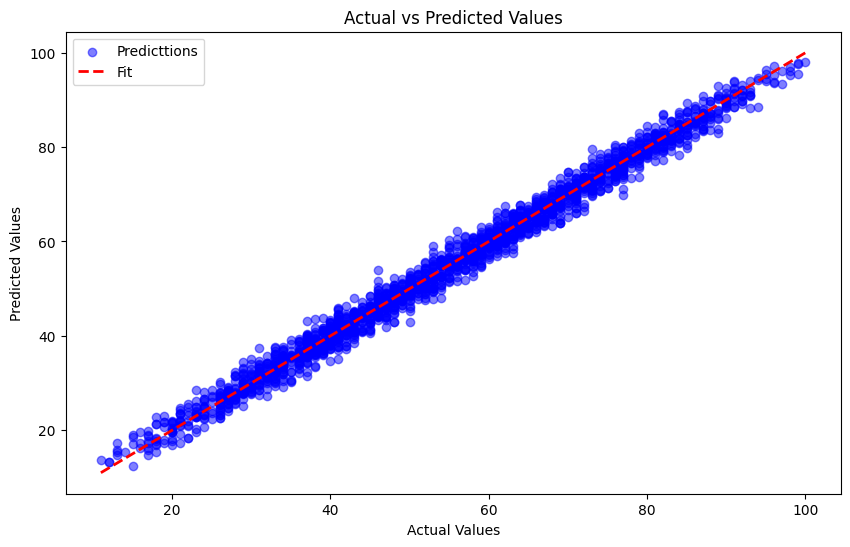

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicttions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Fit')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()

plt.show()